In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stores-area-and-sales-data/Stores.csv


#### Read dataset

In [2]:
store_df= pd.read_csv('../input/stores-area-and-sales-data/Stores.csv')

store_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [3]:
store_df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

#### since store id does not have an impact on store_sales, so dropping it

In [4]:
store_df.drop('Store ID ',axis=1,inplace=True)

#### Checking for missing values in store_df

In [5]:
store_df.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [6]:
### no missing values in store_df

#### Exploratory Data Analysis [EDA]

In [7]:
store_eda_df= store_df.copy()

In [8]:
### information about the dataset [ datatype and number of observations]
store_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [9]:
#### studying about the dataset statitics in overall

store_eda_df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


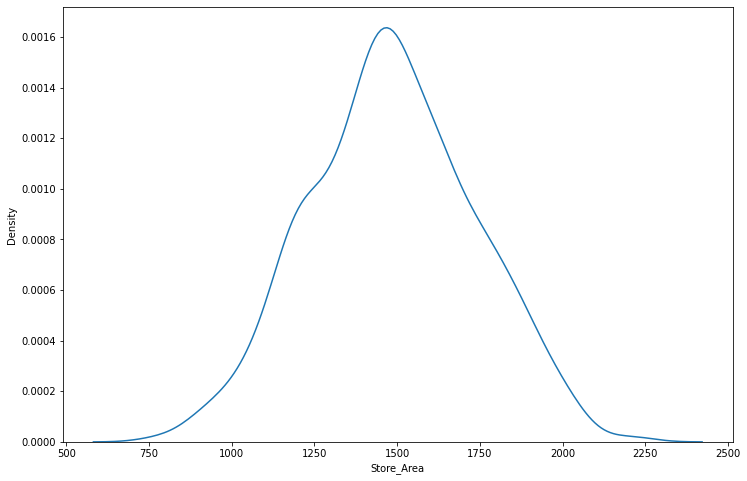

In [10]:
#### plotting the distribution of store area
plt.figure(figsize=(12,8))
sb.distplot(store_eda_df['Store_Area'],hist=False)
plt.show()

##### Observation:

1. Store Area has gaussian distribution


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


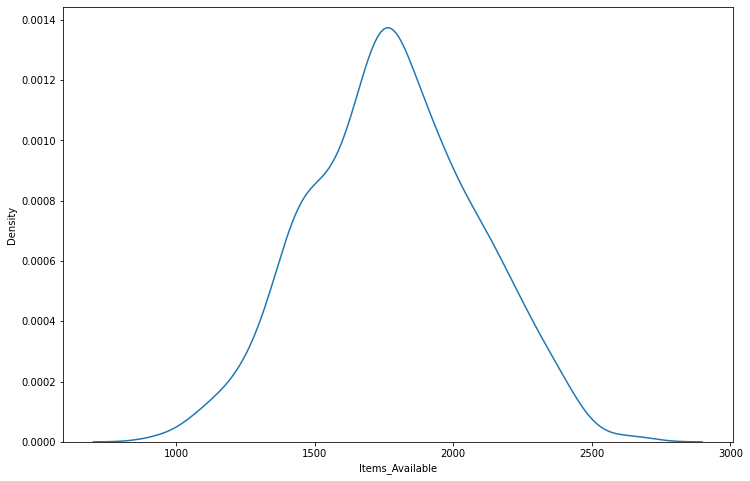

In [11]:
#### plotting the distribution of Items_Available
plt.figure(figsize=(12,8))
sb.distplot(store_eda_df['Items_Available'],hist=False)
plt.show()

##### Observations:

Items_Available is normally distributed

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


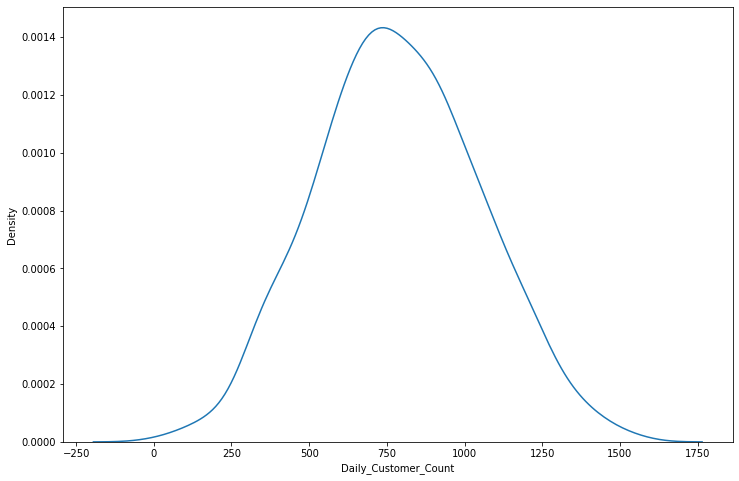

In [12]:
#### plotting the distribution of Daily_Customer_Count
plt.figure(figsize=(12,8))
sb.distplot(store_eda_df['Daily_Customer_Count'],hist=False)
plt.show()

##### Observations:

Daily_Customer_Count is normally distributed

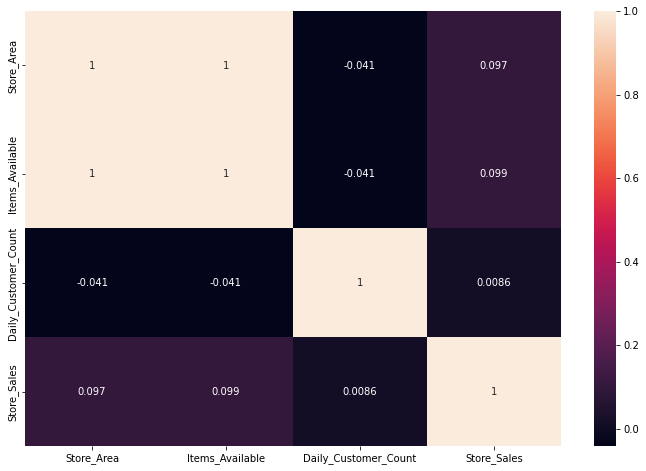

In [13]:
#### drawing the correlation matrix to study the correlation b/w features
plt.figure(figsize=(12,8))
sb.heatmap(store_eda_df.corr(),annot=True)
plt.show()

##### Observations:

1. Store_Area & Items_Available has perfect positive correlation (1)
2. Store_Area & Daily_Customer_Count has weak negative correlation
3. Store_Area & Store_Sales has weak positive correlation
4. Items_Available & Daily_Customer_Count has weak negative correlation
5. Items_Available & Store_Sales has weak positive correlation.
6. Daily_Customer_Count & Store_Sales has weak positive correlation.

In [14]:
#### drawing a scatter plot b/w features
def scatter_plot(data,x,y):
    print(f'----------Drawing a scatter plot between {x} & {y}----------')
    plt.figure(figsize=(12,8))
    plt.scatter(data[x],data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'scatter plot between {x} & {y}')
    plt.show()
    print()
    print()

----------Drawing a scatter plot between Store_Area & Items_Available----------


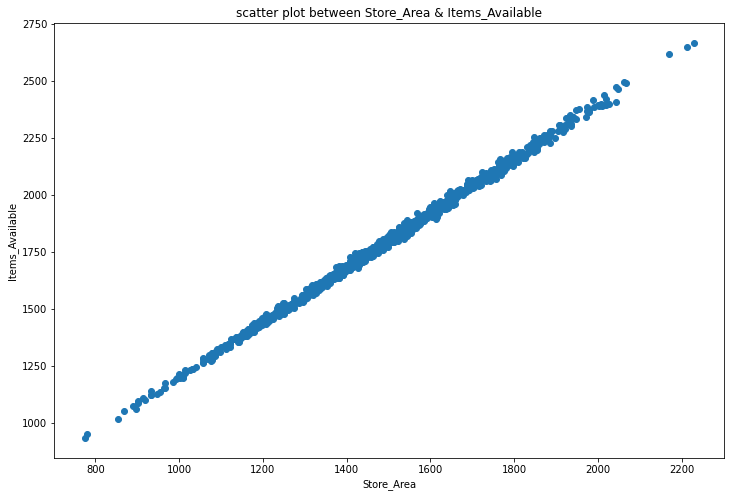



----------Drawing a scatter plot between Store_Area & Daily_Customer_Count----------


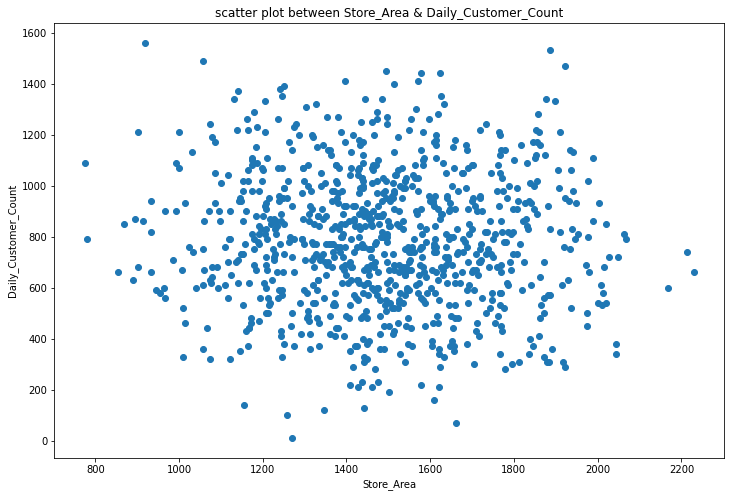



----------Drawing a scatter plot between Store_Area & Store_Sales----------


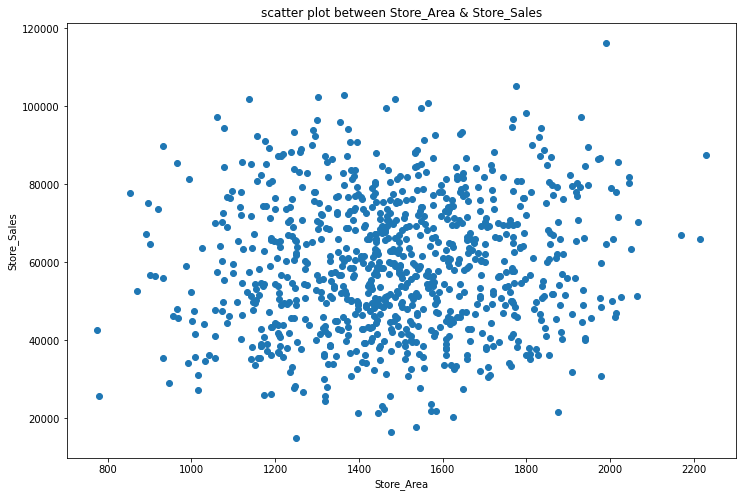



----------Drawing a scatter plot between Items_Available & Store_Area----------


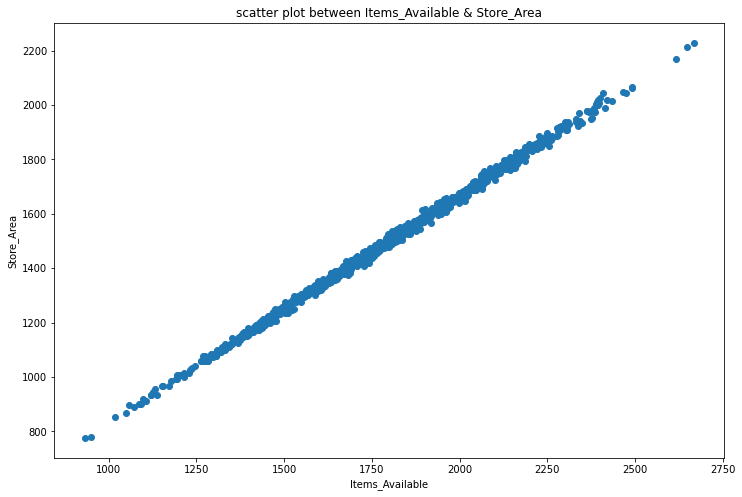



----------Drawing a scatter plot between Items_Available & Daily_Customer_Count----------


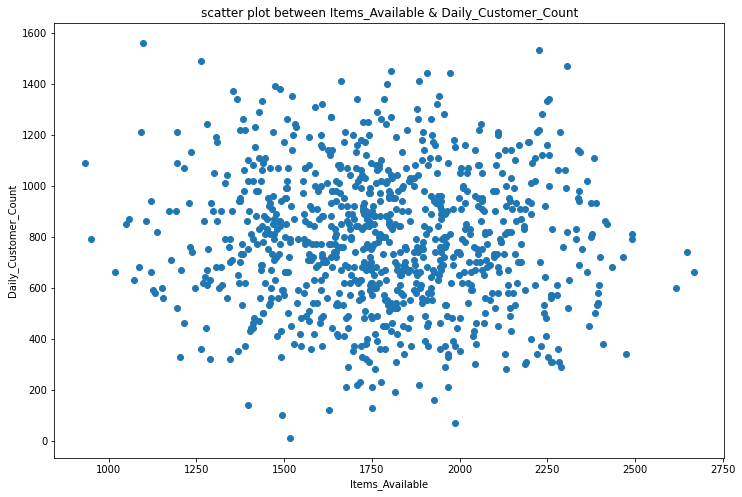



----------Drawing a scatter plot between Items_Available & Store_Sales----------


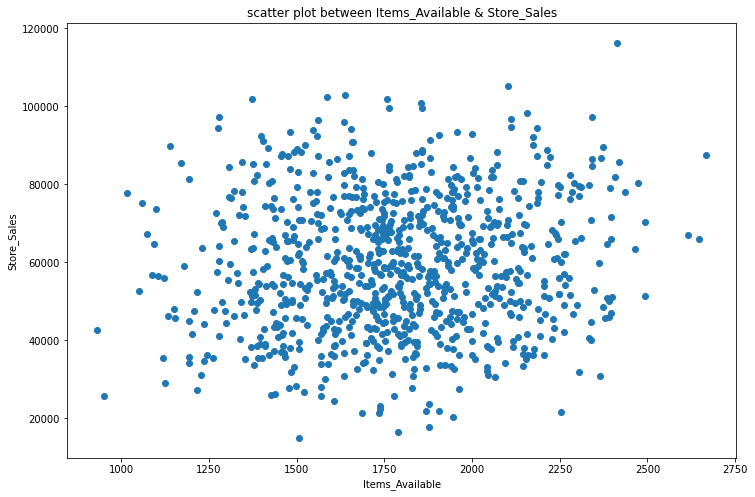



----------Drawing a scatter plot between Daily_Customer_Count & Store_Area----------


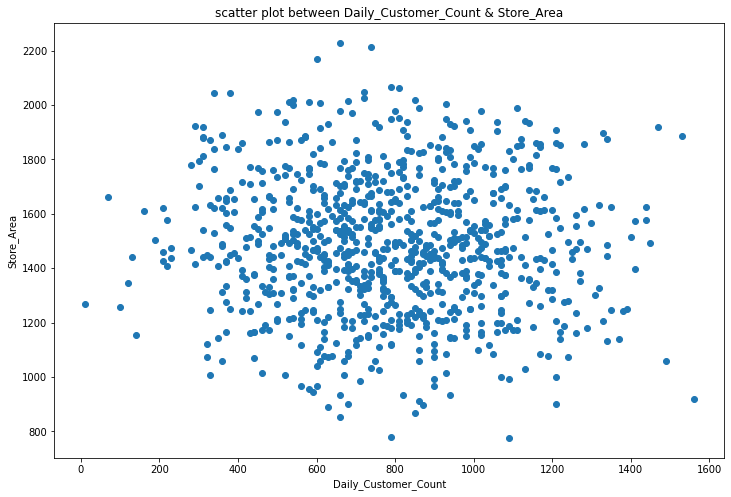



----------Drawing a scatter plot between Daily_Customer_Count & Items_Available----------


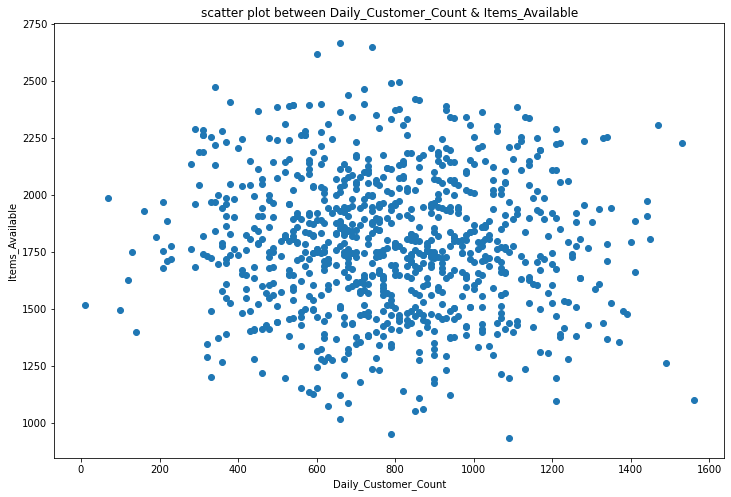



----------Drawing a scatter plot between Daily_Customer_Count & Store_Sales----------


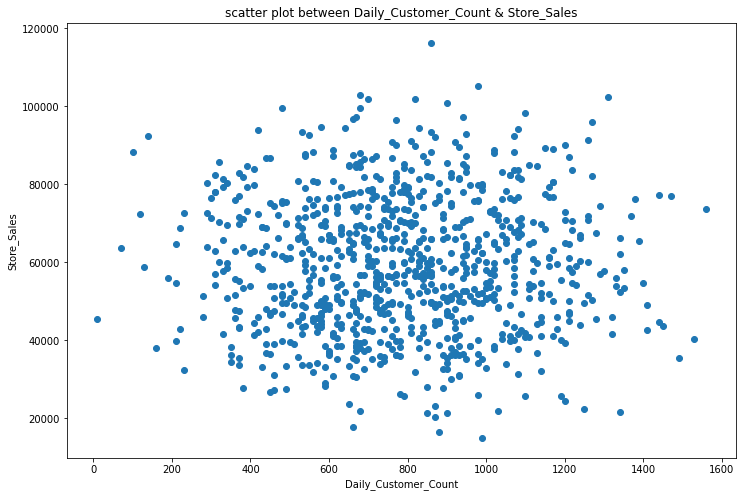



----------Drawing a scatter plot between Store_Sales & Store_Area----------


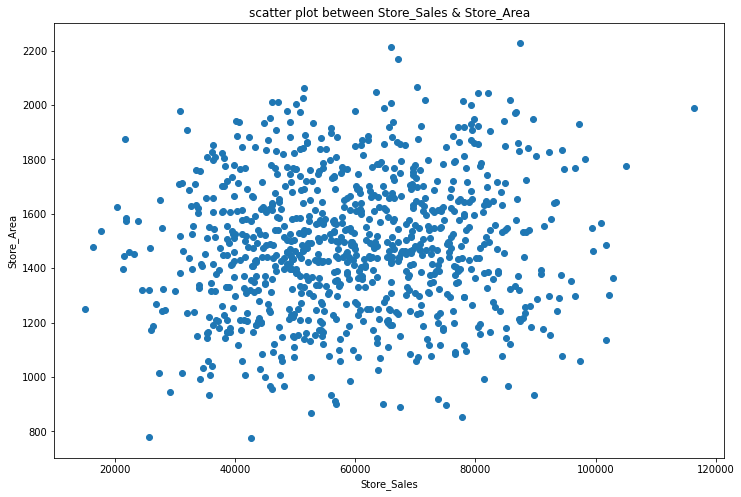



----------Drawing a scatter plot between Store_Sales & Items_Available----------


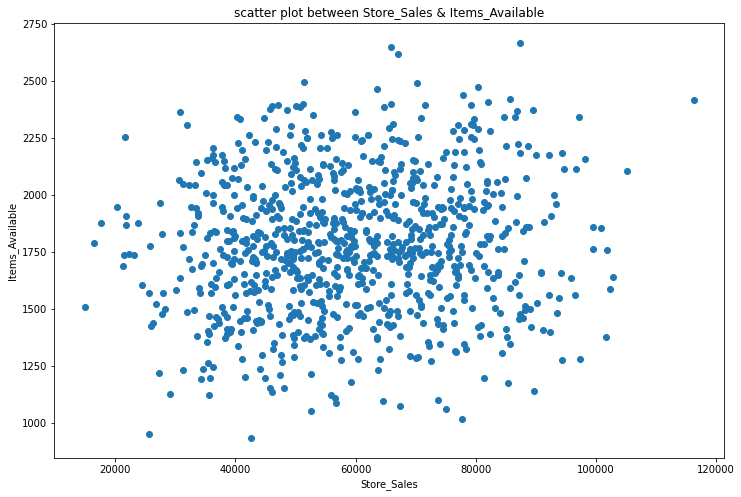



----------Drawing a scatter plot between Store_Sales & Daily_Customer_Count----------


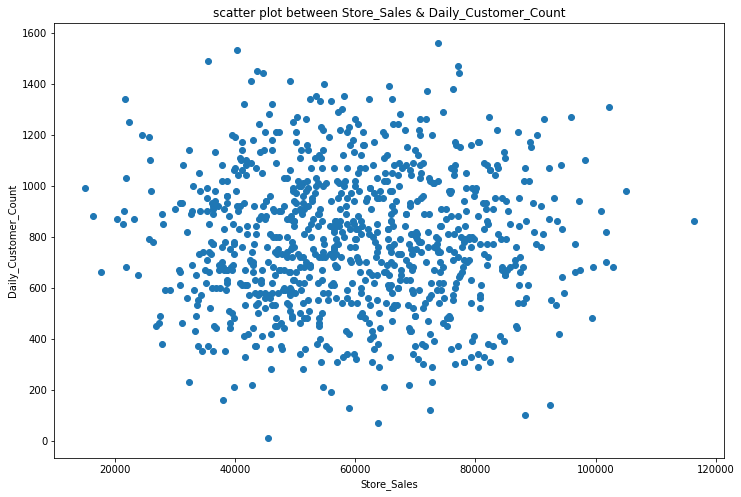

In [15]:
for c in store_eda_df.columns:
    for c1 in store_eda_df.columns:
        if c!=c1:
            scatter_plot(data=store_eda_df,x=c,y=c1)
            

#### Observations:

1. As items_available increases, the store area increases (perfect correlation=1)

2. As store area increases, there is little downward (independent) in the daily_customer count

3. As store area increases, store sales also increases

4. As items available increases, it is independent of daily customer count

5. As items_available increases, store sales increases (not much, but a little +ve correlation)

#### Boxplot

In [16]:
def plot_boxplot(data,x):
    plt.figure(figsize=(12,8))
    plt.title(f'Boxplot for {x}')
    sb.boxplot(data=data,x=x)
    plt.show()
    print()
    

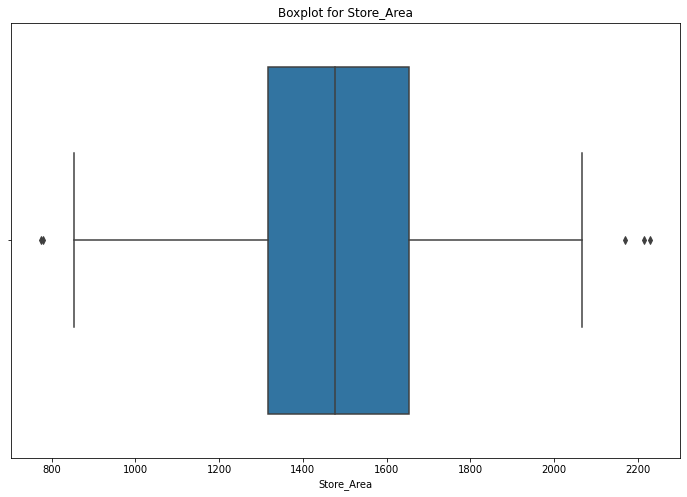

In [17]:
plot_boxplot(data=store_eda_df,x='Store_Area')

#### Observations:

1. 25% of values come under between 800 & 1300

2. 25% of values come under between 1300 & 1500

3. 25% of values come under 1500 to 1700

4. 25% of values come under 1700 to  2100



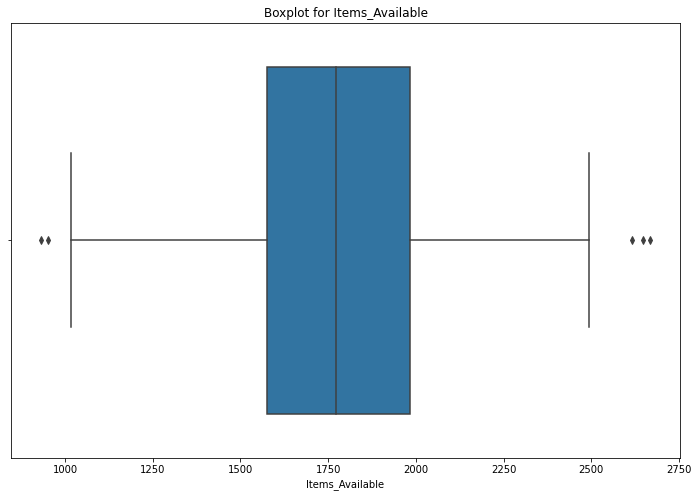

In [18]:
plot_boxplot(data=store_eda_df,x='Items_Available')

##### Observations:
1. 25% of values come under between 1000 & 1550

2. 25% of values come under between 1550 & 1750

3. 25% of values come under 1750 to 2000

4. 25% of values come under 2000 to 2500

In [19]:
store_eda_df.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

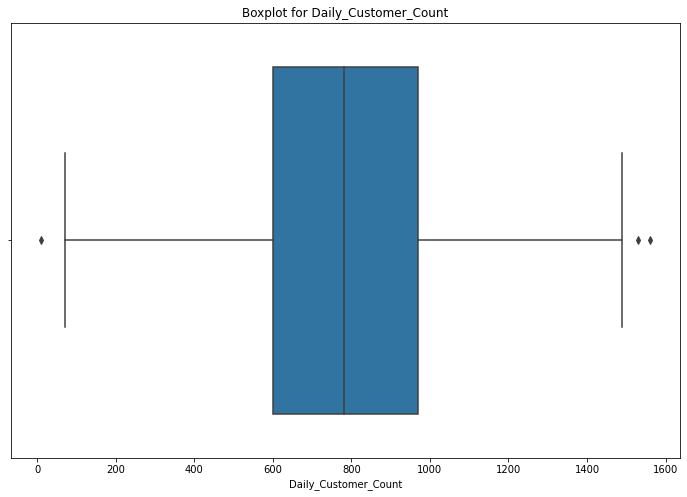

In [20]:
plot_boxplot(data=store_eda_df,x='Daily_Customer_Count')

##### Observations:
1. 25% of values come under between 0 & 610

2. 25% of values come under between 610 & 776

3. 25% of values come under 776 to 1000

4. 25% of values come under 1000 to 1500

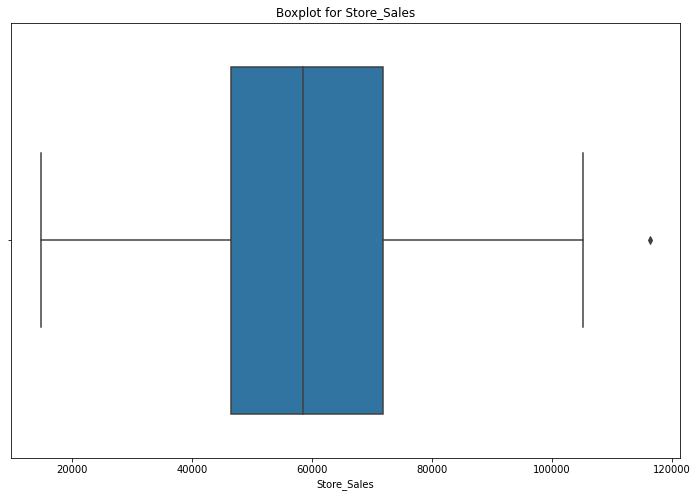

In [21]:
plot_boxplot(data=store_eda_df,x='Store_Sales')

##### Observations:
1. 25% of values come under between 2,00,000 & 4,20,000

2. 25% of values come under between 4,20,000 & 5,80,000

3. 25% of values come under 5,80,000 to 7,00,000

4. 25% of values come under 7,00,000 to 11,00,000

#### Boxenplot

In [22]:
def plot_boxenplot(data,x):
    plt.figure(figsize=(12,8))
    plt.title(f'Boxenplot for {x}')
    sb.boxenplot(data=data,x=x)
    plt.show()
    print()

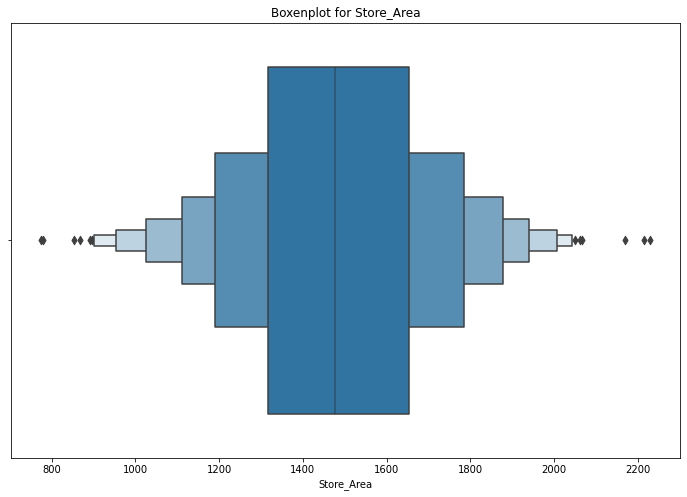

In [23]:
plot_boxenplot(data=store_eda_df,x='Store_Area')

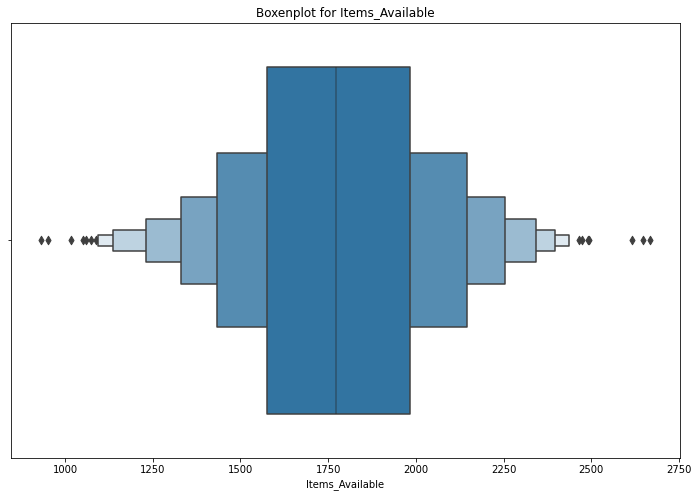

In [24]:
plot_boxenplot(data=store_eda_df,x='Items_Available')

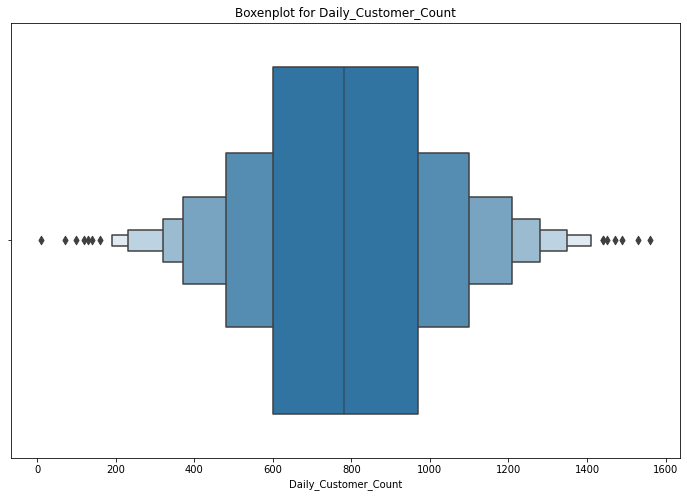

In [25]:
plot_boxenplot(data=store_eda_df,x='Daily_Customer_Count')

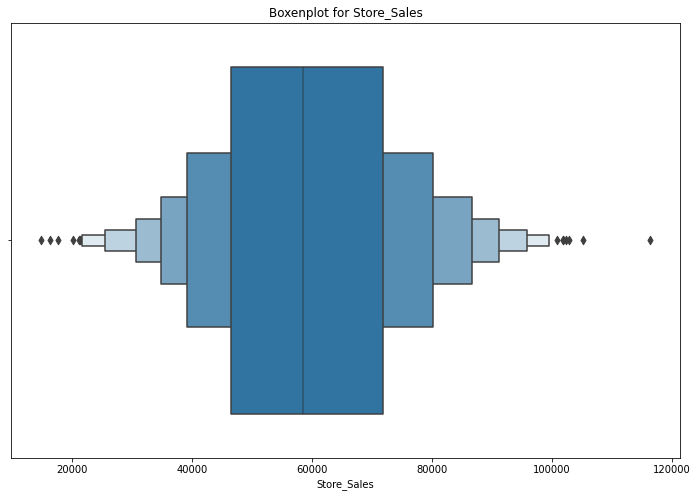

In [26]:
plot_boxenplot(data=store_eda_df,x='Store_Sales')

In [27]:
X= store_df.drop('Store_Sales',axis=1)
y= store_df['Store_Sales']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=0)


#### Scaling : Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train= pd.DataFrame(X_train,columns=X.columns)
X_test= pd.DataFrame(X_test,columns=X.columns)


In [30]:
X_train

,Store_Area,Items_Available,Daily_Customer_Count
0,0.496561,0.508934,0.453947
1,0.797111,0.816715,0.486842
2,0.094911,0.100288,0.559211
3,0.400275,0.399424,0.743421
4,0.083219,0.073199,0.565789
...,...,...,...
801,0.602476,0.620749,0.651316
802,0.472490,0.482997,0.697368
803,0.764787,0.767723,0.539474
804,0.317744,0.334294,0.697368


### Model Study

#### a.   Linear Regression

In [31]:
y_train

773    59190
769    52990
261    56610
883    52160
406    75110
       ...  
835    58160
192    67710
629    62050
559    88210
684    82390
Name: Store_Sales, Length: 806, dtype: int64

In [32]:
import statsmodels.api as sm
X_train= sm.add_constant(X_train)
lr_model= sm.OLS(y_train.ravel(),X_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.964
Date:                Tue, 14 Jun 2022   Prob (F-statistic):             0.0314
Time:                        14:16:18   Log-Likelihood:                -8999.8
No. Observations:                 806   AIC:                         1.801e+04
Df Residuals:                     802   BIC:                         1.803e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.351e+04   2592.035     20.644      0.000    4.84e+04    5.86e+04
Store_Area           -7.047e+04   7.39e+04     -0.954      0.341   -2.16e+05    7.46e+04
Items_Available        7.97e+04   7.35e+04      1.084      0.279   -6.46e+04    2.24e+05
Daily_Customer_Count  2368.0956   3487.886      0.679      0.497   -4478.368    9214.559
==============================================================================
Omnibus:                       15.968   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.614
Skew:                           0.184   Prob(JB):                      0.00301
Kurtosis:                       2.542   Cond. No.                         229.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing the store_area feature to study the impact & applying the linear regression

In [33]:
X_train= X_train.drop(['Store_Area'],axis=1)
X_test= X_test.drop(['Store_Area'],axis=1)
lr_model= sm.OLS(y_train.ravel(),X_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.992
Date:                Tue, 14 Jun 2022   Prob (F-statistic):             0.0188
Time:                        14:16:18   Log-Likelihood:                -9000.3
No. Observations:                 806   AIC:                         1.801e+04
Df Residuals:                     803   BIC:                         1.802e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.335e+04   2586.358     20.627      0.000    4.83e+04    5.84e+04
Items_Available       9648.4383   3495.808      2.760      0.006    2786.438    1.65e+04
Daily_Customer_Count  2465.6894   3486.188      0.707      0.480   -4377.429    9308.808
==============================================================================
Omnibus:                       16.257   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.744
Skew:                           0.184   Prob(JB):                      0.00282
Kurtosis:                       2.538   Cond. No.                         8.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations from the above two linear models

1.  Model 1 was applied with all the input features, the results shows an r2 value of 0.011 & adj r2 of 0.007. Also due to high correlation b/w store area and items available, there is an instability in coefficents which could be refelected in the model 2 where only 2 input features are used (dropping the store_area feature).

2. In model 2 the items_avaialble is found to be significant and the daily customer count is less significant

### KNN Regressor

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X= store_df.drop('Store_Sales',axis=1)
y= store_df['Store_Sales']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=0)
scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train= pd.DataFrame(X_train,columns=X.columns)
X_test= pd.DataFrame(X_test,columns=X.columns)



In [35]:
from sklearn.neighbors import KNeighborsRegressor
knn_model= KNeighborsRegressor()
knn_model.fit(X_train,y_train)
y_pred= knn_model.predict(X_test)
print(f'KNN Model train score: {knn_model.score(X_train,y_train)}')
print(f'KNN Model test score: {knn_model.score(X_test,y_test)}')

KNN Model train score: 0.20411244152888064
KNN Model test score: -0.22677446063407714


#### Decision Tree Regressor

In [36]:
X= store_df.drop('Store_Sales',axis=1)
y= store_df['Store_Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=0)

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train,y_train)
print(f'Decision Tree train score: {dt_regressor.score(X_train,y_train)}')
print(f'Decision Tree test score: {dt_regressor.score(X_test,y_test)}')

Decision Tree train score: 1.0
Decision Tree test score: -0.8684488591374866


### Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor(random_state=1)
rf_reg.fit(X_train,y_train)
print(f'Random Forest train score: {rf_reg.score(X_train,y_train)}')
print(f'Random Forest test score: {rf_reg.score(X_test,y_test)}')

Random Forest train score: 0.8360431619464704
Random Forest test score: -0.109598890923706


### Adaboost Regressor

In [39]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_reg= AdaBoostRegressor(random_state=1)
adaboost_reg.fit(X_train,y_train)
print(f'Adaboost Regressor train score: {adaboost_reg.score(X_train,y_train)}')
print(f'Adaboost Regressor test score: {adaboost_reg.score(X_test,y_test)}')


Adaboost Regressor train score: 0.05229810885937658
Adaboost Regressor test score: -0.0277045885596392


#### Xgboost Regressor

In [40]:
import xgboost
from xgboost import *

In [41]:
xgb_regressor= XGBRegressor(random_state=1)
xgb_regressor.fit(X_train,y_train)
print(f'XGBoost Regressor train score: {xgb_regressor.score(X_train,y_train)}')
print(f'XGBoost Regressor test score: {xgb_regressor.score(X_test,y_test)}')


XGBoost Regressor train score: 0.9331303401894953
XGBoost Regressor test score: -0.0972680275402984


#### Randomized Search Cross Validation 

##### Random Forest Regressor

In [42]:
from sklearn.model_selection import RandomizedSearchCV
params= {'n_estimators':[i for i in range(100,1000,100)],'max_depth':[i for i in range(3,15)],'min_samples_leaf':[i for i in range(30,50,5)]}
random_rf_model= RandomizedSearchCV(estimator=RandomForestRegressor(random_state=1),param_distributions=params,cv=5,scoring='r2',n_iter=50,return_train_score=True,verbose=2,random_state=0)
random_rf_model.fit(X_train,y_train)
print(f'The best model params: {random_rf_model.best_params_}')
print(f'The best model score: {random_rf_model.best_score_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .max_depth=7, min_samples_leaf=35, n_estimators=200; total time=   0.4s
[CV] END .max_depth=7, min_samples_leaf=35, n_estimators=200; total time=   0.4s
[CV] END .max_depth=7, min_samples_leaf=35, n_estimators=200; total time=   0.4s
[CV] END .max_depth=7, min_samples_leaf=35, n_estimators=200; total time=   0.4s
[CV] END .max_depth=7, min_samples_leaf=35, n_estimators=200; total time=   0.4s
[CV] END max_depth=13, min_samples_leaf=45, n_estimators=400; total time=   0.8s
[CV] END max_depth=13, min_samples_leaf=45, n_estimators=400; total time=   0.8s
[CV] END max_depth=13, min_samples_leaf=45, n_estimators=400; total time=   0.8s
[CV] END max_depth=13, min_samples_leaf=45, n_estimators=400; total time=   0.8s
[CV] END max_depth=13, min_samples_leaf=45, n_estimators=400; total time=   0.8s
[CV] END .max_depth=4, min_samples_leaf=40, n_estimators=100; total time=   0.2s
[CV] END .max_depth=4, min_samples_leaf=40, n_e

In [43]:
rf_reg_2= RandomForestRegressor(**random_rf_model.best_params_,random_state=1)
rf_reg_2.fit(X_train,y_train)
print(f'Random Forest train score: {rf_reg_2.score(X_train,y_train)}')
print(f'Random Forest test score: {rf_reg_2.score(X_test,y_test)}')

Random Forest train score: 0.05769601057689344
Random Forest test score: -0.05213181253164123


##### Adaboost Regressor

In [44]:
params= {'n_estimators':[i for i in range(100,1000,100)],'base_estimator':[DecisionTreeRegressor(max_depth=i) for i in range(3,12)]}
adaboost_model= RandomizedSearchCV(estimator=AdaBoostRegressor(random_state=1),param_distributions=params,cv=5,scoring='r2',n_iter=50,return_train_score=True,verbose=2,random_state=0)
adaboost_model.fit(X_train,y_train)
print(f'The best model params: {adaboost_model.best_params_}')
print(f'The best model score: {adaboost_model.best_score_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=500; total time=   1.1s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=500; total time=   0.1s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=500; total time=   0.1s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=500; total time=   0.5s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=500; total time=   0.1s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=6), n_estimators=100; total time=   0.1s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=6), n_estimators=100; total time=   0.2s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=6), n_estimators=100; total time=   0.2s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=6), n_estimators=100; total time=   0.2s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=6), n_est

In [45]:
adaboost_reg_2= AdaBoostRegressor(**adaboost_model.best_params_,random_state=1)
adaboost_reg_2.fit(X_train,y_train)
print(f'Adaboost Regressor train score: {adaboost_reg_2.score(X_train,y_train)}')
print(f'Adaboost Regressor test score: {adaboost_reg_2.score(X_test,y_test)}')

Adaboost Regressor train score: 0.05229810885937658
Adaboost Regressor test score: -0.0277045885596392


In [46]:
params= {'n_estimators':[i for i in range(100,1000,100)],'learning_rate':[0.2,0.6],'subsample':[0.3,0.6,0.9]}
XGBOOST_model= RandomizedSearchCV(estimator=XGBRegressor(random_state=1),param_distributions=params,cv=5,scoring='r2',n_iter=50,return_train_score=True,verbose=2,random_state=0)
XGBOOST_model.fit(X_train,y_train)
print(f'The best model params: {XGBOOST_model.best_params_}')
print(f'The best model score: {XGBOOST_model.best_score_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .learning_rate=0.6, n_estimators=900, subsample=0.9; total time=   2.6s
[CV] END .learning_rate=0.6, n_estimators=900, subsample=0.9; total time=   2.5s
[CV] END .learning_rate=0.6, n_estimators=900, subsample=0.9; total time=   2.6s
[CV] END .learning_rate=0.6, n_estimators=900, subsample=0.9; total time=   3.5s
[CV] END .learning_rate=0.6, n_estimators=900, subsample=0.9; total time=   2.6s
[CV] END .learning_rate=0.6, n_estimators=300, subsample=0.3; total time=   0.9s
[CV] END .learning_rate=0.6, n_estimators=300, subsample=0.3; total time=   0.8s
[CV] END .learning_rate=0.6, n_estimators=300, subsample=0.3; total time=   0.9s
[CV] END .learning_rate=0.6, n_estimators=300, subsample=0.3; total time=   0.8s
[CV] END .learning_rate=0.6, n_estimators=300, subsample=0.3; total time=   0.8s
[CV] END .learning_rate=0.6, n_estimators=800, subsample=0.3; total time=   2.2s
[CV] END .learning_rate=0.6, n_estimators=800, 

In [47]:
xgboost_reg_2= XGBRegressor(**XGBOOST_model.best_params_,random_state=1)
xgboost_reg_2.fit(X_train,y_train)
print(f'XGBoost Regressor train score: {xgboost_reg_2.score(X_train,y_train)}')
print(f'XGBoost Regressor test score: {xgboost_reg_2.score(X_test,y_test)}')

XGBoost Regressor train score: 0.8870907552960147
XGBoost Regressor test score: -0.09428928136954617


#### Observations:

1. Applying the algorithm to the dataset does not give good results even after tuning hyperparameters

2. From the heatmap i could observe that the correlation values between independent variables and dependent varaiables is very low , ie near to zero, which would be the reason though why the models are not performing well.